<a href="https://colab.research.google.com/github/Gail529/chess_ML/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function


In [20]:
data=pd.read_csv('/content/games.csv')

In [16]:
data.columns

Index(['id', 'rated', 'created_at', 'turns', 'victory_status', 'winner',
       'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [22]:
print(len(data.columns))

15


In [21]:
col_list=['rated', 'turns', 'victory_status','created_at','turns', 'increment_code'
,'white_id', 'white_rating', 'black_id','black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply','winner']
data=data.reindex(columns=col_list)
cols=data.columns
cols[-1]

'winner'

In [27]:
x=data.iloc[:,0:15]
y=data['winner']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


# Experimenting with various feature selection techniques

checking for constant features


In [32]:
# import and create the VarianceThreshold object.
from sklearn.feature_selection import VarianceThreshold
vs_constant = VarianceThreshold(threshold=0)

# select the numerical columns only.
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]

# fit the object to our data.
vs_constant.fit(numerical_x_train)

# get the constant colum names.
constant_columns = [column for column in numerical_x_train.columns
                    if column not in numerical_x_train.columns[vs_constant.get_support()]]

# detect constant categorical variables.
constant_cat_columns = [column for column in x_train.columns if (x_train[column].dtype == "object" and len(x_train[column].unique())  == 1 )]

# conctenating the two lists.
all_constant_columns = constant_cat_columns + constant_columns

# drop the constant columns
x_train.drop(labels=all_constant_columns, axis=1, inplace=True)
x_test.drop(labels=all_constant_columns, axis=1, inplace=True)


AttributeError: ignored

checking for quasi constant features

In [14]:
threshold = 0.98

# create empty list
quasi_constant_feature = []

# loop over all the columns
for feature in data.columns:

    # calculate the ratio.
    predominant = (data[feature].value_counts() / np.float(len(data))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

# drop the quasi constant columns
data.drop(labels=quasi_constant_feature, axis=1, inplace=True)

print("Columns after filetring")
print(len(data.columns))



[]
Columns after filetring
16


# Correlation filter methods

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


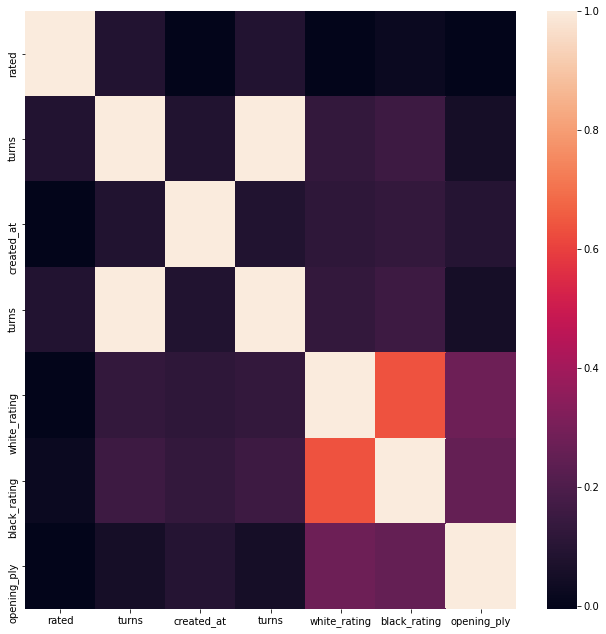

In [33]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = x_train.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
x_train.drop(labels=corr_features, axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)


# **Statistical & Ranking Filter Methods**
Mutual Information


In [ ]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
select_k = 

# get only the numerical features.
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]


# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train, y_train)
# display the retained features.
features = x_train.columns[selection.get_support()]
print(features)


Chi-squared Score


In [ ]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# change this to how much features you want to keep from the top ones.
select_k = 10

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(x_train, y_train)

# display the k selected features.
features = x_train.columns[selection.get_support()]
print(features)

ANOVA Univariate Test


In [ ]:
# import the required functions and object.
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
select_k = 10

# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(f_classif, k=select_k).fit(x_train, y_train)

# display the retained features.
features = x_train.columns[selection.get_support()]
print(features)
